# Fluxonium Design with 6 single qubits NEW EVEN SIMPLER look

# Fluxonium Design version 3.3: with this version Ec is 1.00GHz.
# And LP's are 200nm.

## Design&LOM&GDS

### Preparations

In [1]:
# For convenience, let's begin by enabling
# automatic reloading of modules when they change.
%load_ext autoreload
%autoreload 2

import numpy as np
from collections import OrderedDict

import warnings
warnings.filterwarnings('ignore')

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, open_docs
import matplotlib.pyplot as plt

from qiskit_metal.toolbox_metal import math_and_overrides

from qiskit_metal.qlibrary.core import QComponent

from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder
from qiskit_metal.qlibrary.tlines.anchored_path import RouteAnchors

from qiskit_metal.qlibrary.qubits.fluxoniumEPR import FluxoniumPocket
from qiskit_metal.qlibrary.qubits.fluxoniumLOM import FluxoniumPocket

from qiskit_metal.qlibrary.terminations.launchpad_wb import LaunchpadWirebond

from qiskit_metal.qlibrary.terminations.open_to_ground_v2 import OpenToGround

#from qiskit_metal.analyses.quantization.lumped_oscillator_model_FX import LOManalysis_FX
from qiskit_metal.analyses.quantization import LOManalysis

from qiskit_metal.qlibrary.terminations.ebeam_marker import Markers
from qiskit_metal.qlibrary.terminations.ebeam_frame import Frame


In [2]:
# Each time you create a new quantum circuit design,
# you start by instantiating a QDesign class.

# The design class `DesignPlanar` is best for 2D circuit designs.
design = designs.DesignPlanar()
design.chips.main.material = 'silicon'
design.variables['cpw_width'] = '15 um'
design.variables['cpw_gap'] = '8.733 um'
design._chips['main']['size']['size_x'] = '9mm'
design._chips['main']['size']['size_y'] = '9mm'

# If you disable the next line with "overwrite_enabled", then you will need to
# delete a component [<component>.delete()] before recreating it.
design.overwrite_enabled = True

gui = MetalGUI(design)

In [7]:
from qiskit_metal.qlibrary.terminations.ebeam_marker import Markers

## Markers for ebeam
options = dict(pos_x='4.35mm', pos_y='4.35mm',
                    )
mrk1 = Markers(design, 'marker1', options = options)

options = dict(pos_x='-4.35mm', pos_y='4.35mm',
                    )
mrk2 = Markers(design, 'marker2', options = options)

options = dict(pos_x='-4.35mm', pos_y='-4.35mm',
                    )
mrk3 = Markers(design, 'marker3', options = options)

options = dict(pos_x='4.35mm', pos_y='-4.35mm',
                    )
mrk4 = Markers(design, 'marker4', options = options)


gui.rebuild()

In [4]:
from qiskit_metal.qlibrary.terminations.ebeam_frame import Frame

options = dict(chip='main')
frame = Frame(design, 'frame', options = options)

gui.rebuild()

In [3]:
#Setup the launchpad1 location and orientation

## Read In launch pad
launch_options = dict(chip='main', pos_x='-4.0mm', pos_y='-3.99mm', orientation='0',
        lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPReadIn', options = launch_options)


# Read Out launch pad
launch_options = dict(chip='main', pos_x='4.0mm', pos_y='3.99mm', orientation='180',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPReadOut', options = launch_options)



Transmission_Line = {'pin_inputs':
           {'start_pin': {'component': 'LPReadIn', 'pin': 'tie'},
             'end_pin': {'component': 'LPReadOut', 'pin': 'tie'}},
            'lead': {'start_straight': '3970um', 'end_straight': '3970um',
                    # 'start_jogged_extension': jogs_in,
                    # 'anchors': anchors1,
                    }, 
                    'total_length': '8mm', 'fillet': "90um"
            }

TransLine = RoutePathfinder(design, 'TL', Transmission_Line)


gui.rebuild()

In [23]:
## Q1 flux-bias and charge line
launch_options = dict(chip='main', pos_x='-4.0mm', pos_y='-2.66mm', orientation='0',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPCL1', options = launch_options)

launch_options = dict(chip='main', pos_x='-4.0mm', pos_y='-1.33mm', orientation='0',
                     lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPFB1', options = launch_options)


## Q2 flux-bias and charge line
launch_options = dict(chip='main', pos_x='-4.0mm', pos_y='0.0mm', orientation='0',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPCL2', options = launch_options)

launch_options = dict(chip='main', pos_x='-4.0mm', pos_y='+1.33mm', orientation='0',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPFB2', options = launch_options)


## Q3 flux-bias and charge line
launch_options = dict(chip='main', pos_x='-4.0mm', pos_y='2.66mm', orientation='0',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPCL3', options = launch_options)

launch_options = dict(chip='main', pos_x='-4.0mm', pos_y='3.99mm', orientation='0',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPFB3', options = launch_options)


## Q4 flux-bias and charge line
launch_options = dict(chip='main', pos_x='4.0mm', pos_y='2.66mm', orientation='180',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPFB4', options = launch_options)

launch_options = dict(chip='main', pos_x='4.0mm', pos_y='1.33mm', orientation='180',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPCL4', options = launch_options)


## Q5 flux-bias and charge line
launch_options = dict(chip='main', pos_x='4.0mm', pos_y='0.0mm', orientation='180',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPFB5', options = launch_options)

launch_options = dict(chip='main', pos_x='4.0mm', pos_y='-1.33mm', orientation='180',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPCL5', options = launch_options)


## Q6 flux-bias and charge line
launch_options = dict(chip='main', pos_x='4.0mm', pos_y='-2.66mm', orientation='180',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPFB6', options = launch_options)

launch_options = dict(chip='main', pos_x='4.0mm', pos_y='-3.99mm', orientation='180',
                      lead_length='30um', pad_width='200um',
        pad_height='200um', pad_gap='112um',
                    )
lp = LaunchpadWirebond(design, 'LPCL6', options = launch_options)


gui.rebuild()

In [5]:
from qiskit_metal.qlibrary.qubits.fluxoniumEPR import FluxoniumPocket

gds_cell_name_jj = 'junction_0'
gds_cell_name_inductor = 'jj_array0'

# Q1 details
options = dict(chip='main', nanowire = False, 
            orientation =90, pos_x = '-2.2mm', pos_y = '-2.3mm',
            gds_cell_name=gds_cell_name_jj,
            gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
            fbl_sep='85um', cpw_width ='10um',
                        cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = True,
                            ),
    readout_line_options=Dict(loc_H = -1, make_rol = True, 
              ) )
               
q1 = FluxoniumPocket(design,'Q1', options = dict(
             **options))

# Q6 details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '2.2mm', pos_y = '-3.2mm',
        gds_cell_name=gds_cell_name_jj,
        gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
        fbl_sep='85um', cpw_width ='10um',
                                cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = True,
                            ), 
    readout_line_options=Dict(loc_H = +1, make_rol = True,
              ) )
               
q6 = FluxoniumPocket(design,'Q6', options = dict(
        **options))


# Q2 details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '-2.2mm', pos_y = '0.0mm',
        gds_cell_name=gds_cell_name_jj,
        gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
           fbl_sep='85um', cpw_width ='10um',
                                cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = True,
                            ),
    readout_line_options=Dict(loc_H = -1, make_rol = True,
              ) )
               
q2 = FluxoniumPocket(design,'Q2', options = dict(
        **options))

# Q5 details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '2.4mm', pos_y = '-0.8mm',
        gds_cell_name=gds_cell_name_jj,
               gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
                      
    flux_bias_line_options=Dict(make_fbl = True,
         fbl_sep='85um', cpw_width ='10um',
                                cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = True,
                            ), 
    readout_line_options=Dict(loc_H = +1, make_rol = True,
              ) )
               
q5 = FluxoniumPocket(design,'Q5', options = dict(
        **options))


# Q3 details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '-2.5mm', pos_y = '3.0mm',
        gds_cell_name=gds_cell_name_jj,
        gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
        fbl_sep='85um', cpw_width ='10um',
                                cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = True,
                            ),
    readout_line_options=Dict(loc_H = -1, make_rol = True,
              ) )
               
q3 = FluxoniumPocket(design,'Q3', options = dict(
        **options))

# Q4 details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '2.4mm', pos_y = '2.0mm',
        gds_cell_name=gds_cell_name_jj,
        gds_cell_inductor=gds_cell_name_inductor,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,
        fbl_sep='85um', cpw_width ='10um',
                                cpw_gap = '11.233 um'), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = True,
                            ),
    readout_line_options=Dict(loc_H = 1, make_rol = True,
              ) )
               
q4 = FluxoniumPocket(design,'Q4', options = dict(
        **options))

# Q JJ1 Trial details
options = dict(chip='main',  nanowire = False,
        orientation =90, pos_x = '-1.0mm', pos_y = '1.0mm',
               pocket_width= '600um',
        gds_cell_name=gds_cell_name_jj,
               
    flux_bias_line_options=Dict(make_fbl = False), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = False,
                            ),
    readout_line_options=Dict(loc_H = 1, make_rol = False,
              ) )
               
qJJ1 = FluxoniumPocket(design,'QJJ1', options = dict(
        **options))

# Q JJ2 Trial details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '-1.0mm', pos_y = '1.2mm',
               pocket_width= '600um',
        gds_cell_name=gds_cell_name_jj,   
               
    flux_bias_line_options=Dict(make_fbl = False), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = False,
                            ),
    readout_line_options=Dict(loc_H = 1, make_rol = False,
              ) )
               
qJJ2 = FluxoniumPocket(design,'QJJ2', options = dict(
        **options))

# Q JJ3 Trial details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '-1.0mm', pos_y = '1.4mm',
               pocket_width= '600um',
        gds_cell_name=gds_cell_name_jj,  
               
    flux_bias_line_options=Dict(make_fbl = False), 
               
    charge_line_options=Dict(loc_H = -1, make_cl = False,
                            ),
    readout_line_options=Dict(loc_H = 1, make_rol = False,
              ) )
               
qJJ3 = FluxoniumPocket(design,'QJJ3', options = dict(
        **options))


# Q Array1 details
options = dict(chip='main', nanowire = False, 
            orientation =90, pos_x = '1.0mm', pos_y = '0.6mm',
            gds_cell_inductor=gds_cell_name_inductor , pocket_width= '600um',
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = False,
                        ), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = False,
               ),
    readout_line_options=Dict(loc_H = -1, make_rol = False, 
              ) )
               
qArr1 = FluxoniumPocket(design,'QArr1', options = dict(
             **options))


# Q Array2 Trial details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '1.0mm', pos_y = '0.8mm',
               pocket_width= '600um',
        gds_cell_inductor=gds_cell_name_inductor ,   
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = False,
                               ), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = False,
                            ),
    readout_line_options=Dict(loc_H = -1, make_rol = False, 
              ) )
               
qArr2 = FluxoniumPocket(design,'QArr2', options = dict(
        **options))

# Q Array3 Trial details
options = dict(chip='main', nanowire = False,
        orientation =90, pos_x = '1.0mm', pos_y = '1.0mm',
               pocket_width= '600um',
        gds_cell_inductor=gds_cell_name_inductor , 
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = False,
                      ), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = False,
                            ),
    readout_line_options=Dict(loc_H = -1, make_rol = False, 
              ) )
               
qArr3 = FluxoniumPocket(design,'QArr3', options = dict(
        **options))


gui.rebuild()

In [4]:
from qiskit_metal.qlibrary.qubits.half_cross import HalfCrossmon

gds_cell_name_jj = 'junction_0'

# Q2 details
options = dict(chip='main', palm_radius='100um',    pad_head='400um',
        pad_arms='1000um',     pad_width='100um',
            orientation =0, pos_x = '-0.0mm', pos_y = '0.15mm',
           
               
    flux_bias_line_options=Dict(make_fbl = True,
                 fbl_sep='60um',       ), 
               )
               
q2 = HalfCrossmon(design,'Q2', options = dict(
             **options))

gui.rebuild()

In [6]:
# Lambda/2 resonator for Q1
otg1 = OpenToGround(design, 'otg1s', options=dict(chip='main', 
                 pos_x='-37.733um', pos_y='-2.8mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity1',  Dict(meander=Dict(spacing='200um'),
        total_length='8.4mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg1s', pin='open'),
            end_pin=Dict(component='Q1', pin='readout_line')), ))


gui.rebuild()

In [12]:
# Lambda/2 resonator for Q6
otg6 = OpenToGround(design, 'otg6s', options=dict(chip='main', pos_x='37.733um',  pos_y='-2.8mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity6',  Dict(meander=Dict(spacing='200um'),
        total_length='9.0mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg6s', pin='open'),
            end_pin=Dict(component='Q6', pin='readout_line')), ))


gui.rebuild()

In [13]:
# Lambda/2 resonator for Q2
otg2 = OpenToGround(design, 'otg2s', options=dict(chip='main', pos_x='-37.733um',  pos_y='-0.2mm', orientation='90'))
rt_meander = RouteMeander(design, 'cavity2',  Dict(meander=Dict(spacing='200um'),
        total_length='9.6mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg2s', pin='open'),
            end_pin=Dict(component='Q2', pin='readout_line')), ))


gui.rebuild()

In [14]:
# Lambda/2 resonator for Q5
otg5 = OpenToGround(design, 'otg5s', options=dict(chip='main', pos_x='37.733um',  pos_y='-0.9mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity5',  Dict(meander=Dict(spacing='200um'),
        total_length='10.2mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg5s', pin='open'),
            end_pin=Dict(component='Q5', pin='readout_line')), ))


gui.rebuild()

In [15]:
# Lambda/2 resonator for Q3
otg3 = OpenToGround(design, 'otg3s', options=dict(chip='main', pos_x='-37.733um',  pos_y='2.6mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity3',  Dict(meander=Dict(spacing='200um'),
        total_length='11.0mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg3s', pin='open'),
            end_pin=Dict(component='Q3', pin='readout_line')), ))


gui.rebuild()

In [16]:
# Lambda/2 resonator for Q4
otg4 = OpenToGround(design, 'otg4s', options=dict(chip='main', pos_x='37.733um',  pos_y='2.0mm', orientation='270'))
rt_meander = RouteMeander(design, 'cavity4',  Dict(meander=Dict(spacing='200um'),
        total_length='11.9mm',
        hfss_wire_bonds = True,
        fillet='99um',
        lead = dict(start_straight='250um'),
        pin_inputs=Dict(
            start_pin=Dict(component='otg4s', pin='open'),
            end_pin=Dict(component='Q4', pin='readout_line')), ))


gui.rebuild()
gui.autoscale()

In [24]:
# Charge Line and Flux Bias Line for Q1
XYCharge_LineQ1 = RoutePathfinder(design, 'XY_Gate1', 
        options = dict(chip='main', fillet='99um',
            lead=dict(start_straight='150um', end_straight='600um', 
                     ),
            pin_inputs=Dict(start_pin=Dict(component='Q1', pin='charge_line'),
                            end_pin=Dict(component='LPCL1', pin='tie')
                                            )))

gui.rebuild()

In [8]:
# Charge Line and Flux Bias Line for Q1
ZFluxBias_LineQ1 = RoutePathfinder(design, 'Z_Gate1', 
        options = dict(chip='main', fillet='99um',
            lead=dict(start_straight='200um', 
        end_straight='400um'),
        pin_inputs=Dict(start_pin=Dict(component='Q1', 
              pin='flux_bias_line'),
          end_pin=Dict(component='LPFB1', pin='tie')
                                   )))

gui.rebuild()

In [19]:
# Charge Lıne and Flux Bias Line for Q2
XYCharge_LineQ2 = RoutePathfinder(design, 'XY_Gate2', options = dict(chip='main',
                        fillet='80um',
                lead=dict(start_straight='150um', end_straight='850um'),
                pin_inputs=Dict(start_pin=Dict(component='Q2', pin='charge_line'),
                                    end_pin=Dict(component='LPCL2',pin='tie')
                                            )))

gui.rebuild()

In [20]:
# Charge Lıne and Flux Bias Line for Q2
ZFluxBias_LineQ2 = RoutePathfinder(design, 'Z_Gate2', options = dict(chip='main',
             fillet='99um',
          lead=dict(start_straight='250um', end_straight='250um'),
        pin_inputs=Dict(start_pin=Dict(component='Q2', pin='flux_bias_line'),
                            end_pin=Dict(component='LPFB2',pin='tie')
                                            )))

gui.rebuild()

In [21]:
# Charge Lıne and Flux Bias Line for Q3
XYCharge_LineQ3 = RoutePathfinder(design, 'XY_Gate3', options = dict(chip='main',
                         fillet='99um',
       lead=dict(start_straight='250um', end_straight='450um'), 
            pin_inputs=Dict(start_pin=Dict(component='Q3', pin='charge_line'),
                    end_pin=Dict(component='LPCL3', pin='tie')
                                            )))
gui.rebuild()

In [22]:
# Charge Lıne and Flux Bias Line for Q3
ZFluxBias_LineQ3 = RoutePathfinder(design, 'Z_Gate3', options = dict(chip='main',
                fillet='99um',
           lead=dict(start_straight='100um', end_straight='200um'),
            pin_inputs=Dict(start_pin=Dict(component='Q3', pin='flux_bias_line'),
                end_pin=Dict(component='LPFB3', pin='tie')
                                            )))

gui.rebuild()

In [23]:
# Charge Lıne and Flux Bias Line for Q6
XYCharge_LineQ6 = RoutePathfinder(design, 'XY_Gate6', 
        options = dict(chip='main', fillet='99um',
        lead=dict(start_straight='100um', end_straight='650um'),
    pin_inputs=Dict(start_pin=Dict(component='Q6', pin='charge_line'),
    end_pin=Dict(component='LPCL6', pin='tie')
                                            )))

gui.rebuild()

In [24]:
# Charge Lıne and Flux Bias Line for Q6
ZFluxBias_LineQ6 = RoutePathfinder(design, 'Z_Gate6', 
        options = dict(chip='main', fillet='99um',
            lead=dict(start_straight='350um', end_straight='650um'),
        pin_inputs=Dict(start_pin=Dict(component='Q6', 
              pin='flux_bias_line'),
          end_pin=Dict(component='LPFB6', pin='tie')
                                   )))

gui.rebuild()

In [25]:
# Charge Lıne and Flux Bias Line for Q5
XYCharge_LineQ5 = RoutePathfinder(design, 'XY_Gate5', options = dict(chip='main',
                          fillet='99um',
            lead=dict(start_straight='250um', end_straight='650um'),
                    pin_inputs=Dict(start_pin=Dict(component='Q5',pin='charge_line'),
                    end_pin=Dict(component='LPCL5', pin='tie')
                                            )))

gui.rebuild()

In [26]:
# Charge Line and Flux Bias Line for Q5
ZFluxBias_LineQ5 = RoutePathfinder(design, 'Z_Gate5', options = dict(chip='main',
                        fillet='99um',
            lead=dict(start_straight='200um', end_straight='450um'),
                pin_inputs=Dict(start_pin=Dict(component='Q5', pin='flux_bias_line'),
                            end_pin=Dict(component='LPFB5', pin='tie')
                                            )))
gui.rebuild()

In [27]:
# Charge Line and Flux Bias Line for Q4
XYCharge_LineQ4 = RoutePathfinder(design, 'XY_Gate4', options = dict(chip='main',
                    fillet='99um',
                    lead=dict(start_straight='200um', end_straight='550um'),pin_inputs=Dict(
                        start_pin=Dict(component='Q4', pin='charge_line'),
                            end_pin=Dict(component='LPCL4', pin='tie')
                                            )))
gui.rebuild()

In [28]:
# Charge Lıne and Flux Bias Line for Q4
ZFluxBias_LineQ4 = RoutePathfinder(design, 'Z_Gate4', options = dict(chip='main',
                            fillet='99um',
                    lead=dict(start_straight='150um', end_straight='200um'), pin_inputs=Dict(
                            start_pin=Dict(component='Q4',
                                pin='flux_bias_line'),
                                end_pin=Dict(component='LPFB4',
                                        pin='tie')
                                            )))
gui.rebuild()

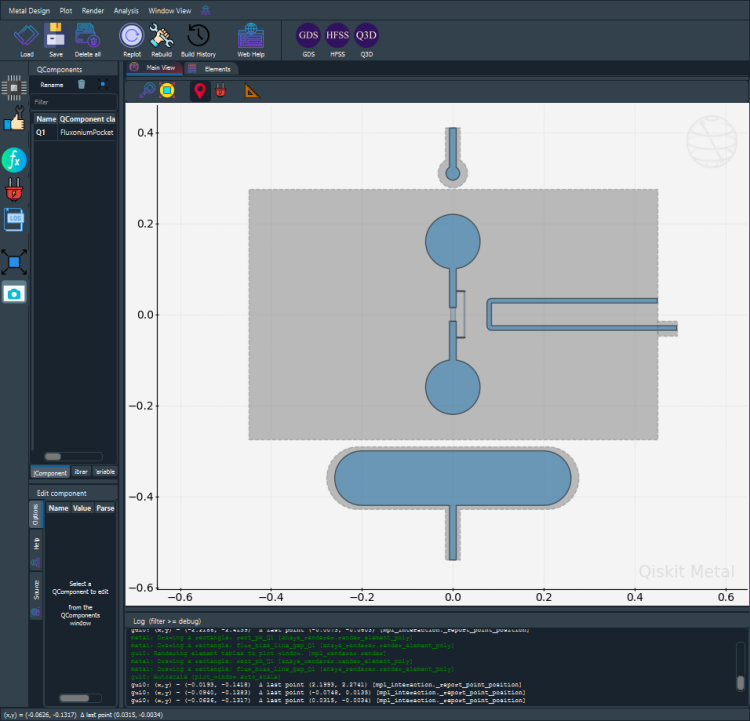

In [13]:
#Save screenshot as a .png formatted file.
gui.screenshot()

In [30]:
q1 #print Q1 information


name:    Q1
class:   FluxoniumPocket       
options: 
  'pos_x'             : '-2.2mm',                     
  'pos_y'             : '-2.3mm',                     
  'orientation'       : 90,                           
  'chip'              : 'main',                       
  'layer'             : '1',                          
  'connection_pads'   : {
                        },
  'pad_gap'           : '30um',                       
  'inductor_width'    : '10um',                       
  'inductor_orientation': '-1',                         
  'pad_width'         : '15um',                       
  'pad_height'        : '110um',                      
  'pad_radius'        : '45um',                       
  'l_width'           : '1um',                        
  'array_length'      : '130um',                      
  'l_arm_width'       : '2um',                        
  'l_arm_length'      : '25um',                       
  'l_inductance'      : '200nH',                      
  'l_ind_pe

# LOM Fluxonium Qubits

In [1]:
%reload_ext autoreload
%autoreload 2

import numpy as np
from collections import OrderedDict

import warnings
warnings.filterwarnings('ignore')

import qiskit_metal as metal
from qiskit_metal import designs, draw
from qiskit_metal import MetalGUI, Dict, open_docs
from qiskit_metal.qlibrary.qubits.fluxoniumLOM import FluxoniumPocket

from qiskit_metal.toolbox_metal import math_and_overrides

from qiskit_metal.qlibrary.core import QComponent

from qiskit_metal.renderers.renderer_ansys.ansys_renderer import QAnsysRenderer


In [2]:
# Each time you create a new quantum circuit design,
# you start by instantiating a QDesign class.

# The design class `DesignPlanar` is best for 2D circuit designs.
design = designs.DesignPlanar()
design.chips.main.material = 'silicon'
design.variables['cpw_width'] = '15 um'
design.variables['cpw_gap'] = '8.733 um'
design._chips['main']['size']['size_x'] = '9mm'
design._chips['main']['size']['size_y'] = '9mm'

# If you disable the next line with "overwrite_enabled", then you will need to
# delete a component [<component>.delete()] before recreating it.
design.overwrite_enabled = True

gui = MetalGUI(design)

In [3]:
from qiskit_metal.qlibrary.qubits.fluxoniumLOM import FluxoniumPocket
from qiskit_metal.qlibrary.qubits.tmon import Tmon

gds_cell_name_jj = 'junction_0'
gds_cell_name_inductor = 'jj_array0'

# Q1 details
options = dict(chip='main', nanowire = False, 
            orientation =0, pos_x = '0mm', pos_y = '0mm',
            gds_cell_name=gds_cell_name_jj,
            gds_cell_inductor=gds_cell_name_inductor ,
               inductor_orientation='-1',
               
    flux_bias_line_options=Dict(make_fbl = True,), 
               
    charge_line_options=Dict(loc_H = +1, make_cl = True,
           ),
    readout_line_options=Dict(loc_H = -1, make_rol = True,  
           ) )
               
q1 = FluxoniumPocket(design,'Q1', options = dict(
             **options))

# Q2 details
options = dict(chip='main', 
            orientation =90, pos_x = '-2.2mm', pos_y = '0.0mm',
              gds_cell_name=gds_cell_name_jj,
                             
    flux_bias_line_options=Dict(make_fbl = True,
            ), 
     )
               
q2 = Tmon(design,'Q2', options = dict(
             **options))

gui.rebuild()
#gui.autoscale()

## 2. Capacitance Analysis and LOM derivation using the analysis package - most users

In [15]:
#from qiskit_metal.analyses.quantization.lumped_oscillator_model_FX import LOManalysis_FX
from qiskit_metal.analyses.quantization import LOManalysis

c1 = LOManalysis(design, "q3d")

In [16]:
c1.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'freq_ghz': 5.0,
 'save_fields': False,
 'enabled': True,
 'max_passes': 15,
 'min_passes': 2,
 'min_converged_passes': 2,
 'percent_error': 0.5,
 'percent_refinement': 30,
 'auto_increase_solution_order': True,
 'solution_order': 'High',
 'solver_type': 'Iterative'}

In [17]:
# for second method. dont run this
# example: update single setting
c1.sim.setup.max_passes = 15
# example: update multiple settings
c1.sim.setup_update(solution_order = 'Medium', auto_increase_solution_order = 'False')

c1.sim.setup

{'name': 'Setup',
 'reuse_selected_design': True,
 'reuse_setup': True,
 'freq_ghz': 5.0,
 'save_fields': False,
 'enabled': True,
 'max_passes': 15,
 'min_passes': 2,
 'min_converged_passes': 2,
 'percent_error': 0.5,
 'percent_refinement': 30,
 'auto_increase_solution_order': 'False',
 'solution_order': 'Medium',
 'solver_type': 'Iterative'}

In [18]:
c1.sim.run(components=['Q1'], open_terminations=[('Q1', 'charge_line'), ('Q1', 'flux_bias_line'), ('Q1', 'fake_flux_bias_line'), ('Q1', 'readout_line')])
c1.sim.capacitance_matrix

INFO 01:06AM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 01:06AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 01:06AM [analyze]: Analyzing setup Setup
INFO 01:08AM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppData\Local\Temp\tmp7fmne2n8.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 01:08AM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppData\Local\Temp\tmpe81bvxxj.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 01:08AM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppData\Local\Temp\tmp9sio8336.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 01:08AM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppData\Local\Temp\tmp3cfrnp_3.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSi

,charge_line_Q1,flux_bias_line_Q1,ground_main_plane,pad_bot_Q1,pad_top_Q1,readout_padNline_Q1
charge_line_Q1,22.19642,-0.11996,-21.16795,-0.06692,-0.60029,-0.04569
flux_bias_line_Q1,-0.11996,59.08998,-45.17021,-4.77752,-4.80666,-2.19657
ground_main_plane,-21.16795,-45.17021,348.80586,-21.81290,-25.62848,-166.43170
pad_bot_Q1,-0.06692,-4.77752,-21.81290,37.05054,-3.51857,-5.45229
pad_top_Q1,-0.60029,-4.80666,-25.62848,-3.51857,37.01512,-1.05646
readout_padNline_Q1,-0.04569,-2.19657,-166.43170,-5.45229,-1.05646,177.56314


In [1]:
# capacitance with pocket-height=650um

Cpad_top = 25.61395
Cpad_bot = 21.79921
Creadout_bot = 5.45500
Creadout_top = 1.05780
Ccharge_top = 0.60025
Cfluxpad_top = 4.80577
Cfluxpad_bot = 4.77768

C_pads = 3.51689

C_top = Cpad_top + Ccharge_top + Cfluxpad_top + Creadout_top
C_bot = Cpad_bot + Creadout_bot + Cfluxpad_bot

Csigma = C_pads + C_top*C_bot/(C_top+C_bot)
print('Ctop:', C_top, 'fF')
print('Cbot:', C_bot, 'fF')
print('Total Capacitance:', Csigma, 'fF')

Ctop: 32.077769999999994 fF
Cbot: 32.031890000000004 fF
Total Capacitance: 19.54429679150849 fF


In [4]:
import numpy as np
e = 1.60217663e-19
hbar = 1.05457182e-34

Ec = e**2/(2*Csigma*1e-15)
Charging_energy = 1e-6*Ec/(2*np.pi*hbar)
print('Charging Energy:', Charging_energy, 'MHz')
print('E_c:', Ec, '...')

Charging Energy: 991.0936879100383 MHz
E_c: 6.567056315972036e-25 ...


In [10]:
c1.sim.run(components=['Q2'], open_terminations=[('Q2', 'flux_bias_line')])
c1.sim.capacitance_matrix

INFO 01:02AM [connect_design]: 	Opened active design
	Design:    Design_q3d [Solution type: Q3D]
INFO 01:02AM [get_setup]: 	Opened setup `Setup`  (<class 'pyEPR.ansys.AnsysQ3DSetup'>)
INFO 01:02AM [analyze]: Analyzing setup Setup
INFO 01:03AM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppData\Local\Temp\tmpup388d3a.txt, C, , Setup:LastAdaptive, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 01:03AM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppData\Local\Temp\tmphn244nbs.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 1, False
INFO 01:03AM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppData\Local\Temp\tmpi9grhjy1.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSie", 5000000000, Maxwell, 2, False
INFO 01:03AM [get_matrix]: Exporting matrix data to (C:\Users\FIGENY~1\AppData\Local\Temp\tmpr2eyblrd.txt, C, , Setup:AdaptivePass, "Original", "ohm", "nH", "fF", "mSi

,flux_bias_line_Q2,ground_main_plane,tmon_Q2
flux_bias_line_Q2,20.52333,-19.59848,-0.82579
ground_main_plane,-19.59848,293.59739,-198.69216
tmon_Q2,-0.82579,-198.69216,206.13575


In [5]:
## Calculating the total capacitance of tmon
epsilon=11.68  #silicon, unit is F/m
A=96000*(10^-12)
d=60*(10^-6)

C=epsilon*A/d

print('Total Capacitance:', C, 'F')

Total Capacitance: 2336.0 F


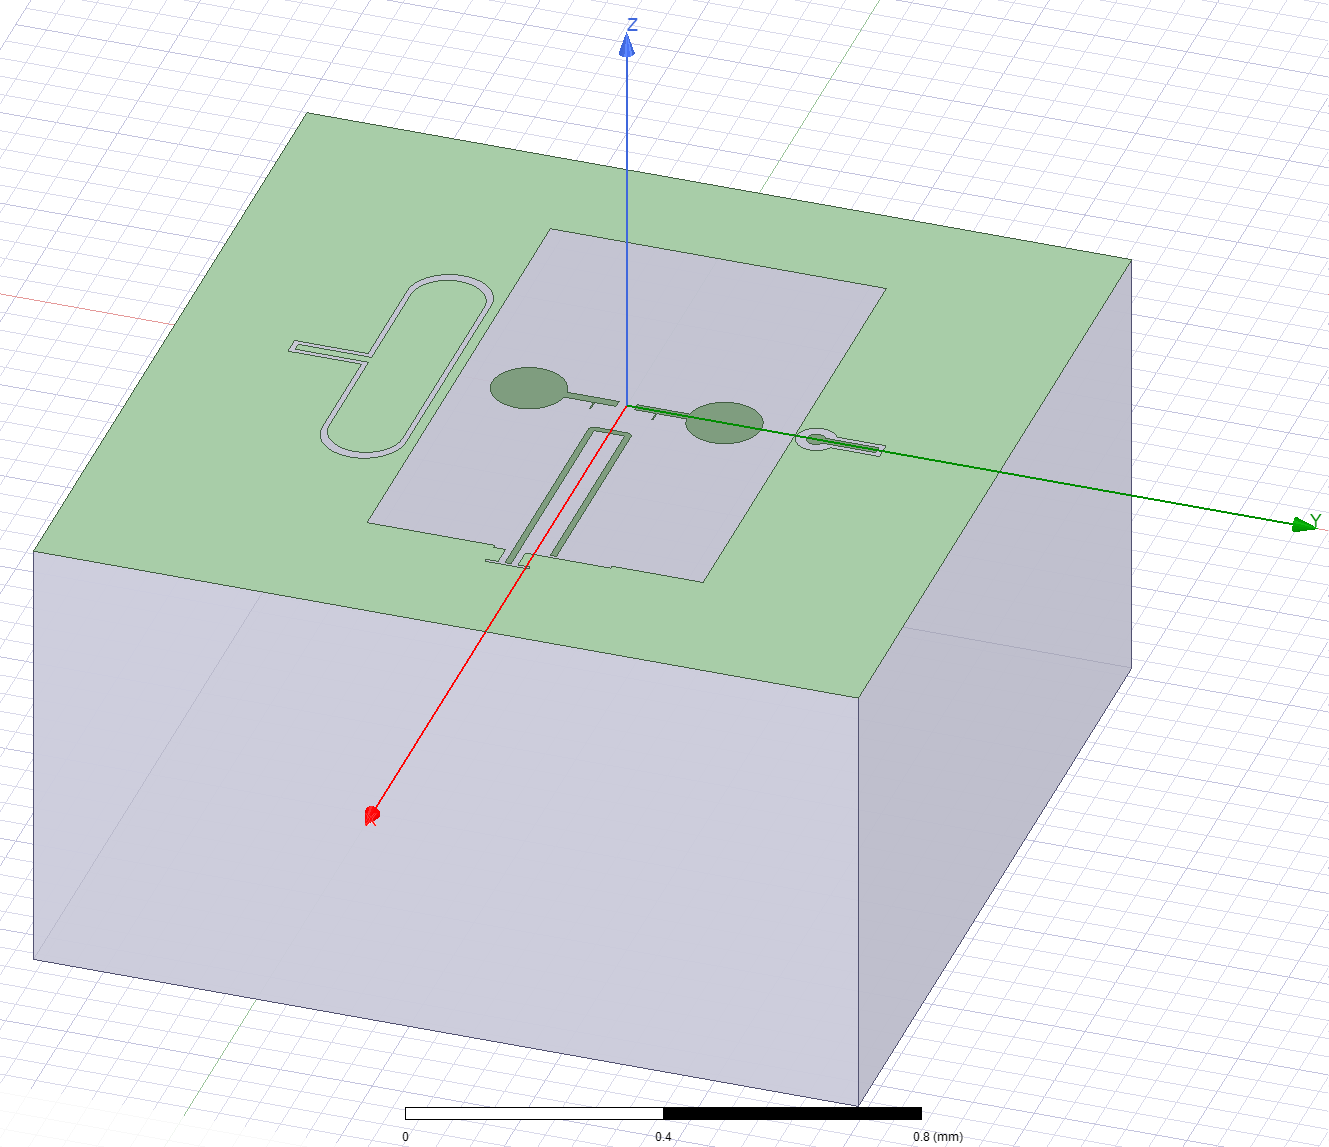

WindowsPath('C:/Users/figenyilmaz/Desktop/qiskit-metal/tutorials_ME/Figen/Fluxonium/GDS-DR/ansys.png')

In [12]:
c1.sim.save_screenshot()

In [12]:
from qiskit_metal.analyses.quantization.lumped_oscillator_model_FX import LOManalysis_FX


In [20]:
c1.setup.junctions = Dict({'Lj': 34.38, 'Cj': 0})
c1.setup.freq_readout = [6.30] ## Cavity1 
c1.setup.freq_bus = [5.24, 1.0]

c1.run_lom()
c1.lumped_oscillator_all

[3, 4] [5 0 1]
Predicted Values

Transmon Properties
f_Q 4.888262 [GHz]
EC 989.845102 [MHz]
EJ 4.752635 [GHz]
alpha -893.556866 [MHz]
dispersion 1119607.530054 [KHz]
Lq 34.366136 [nH]
Cq 19.568949 [fF]
T1 216.974744 [us]

**Coupling Properties**

tCqbus1 2.197016 [fF]
gbus1_in_MHz 54.671275 [MHz]
χ_bus1 -1.687684 [MHz]
1/T1bus1 721.430735 [Hz]
T1bus1 220.610151 [us]

tCqbus2 -0.266777 [fF]
gbus2_in_MHz -5.534429 [MHz]
χ_bus2 -0.125556 [MHz]
1/T1bus2 12.087546 [Hz]
T1bus2 13166.853095 [us]

tCqbus3 -0.015894 [fF]
gbus3_in_MHz -0.062907 [MHz]
χ_bus3 -0.000001 [MHz]
1/T1bus3 0.000007 [Hz]
T1bus3 22056838852.190464 [us]
Bus-Bus Couplings
gbus1_2 0.235571 [MHz]
gbus1_3 1.255225 [MHz]
gbus2_3 0.073027 [MHz]


,fQ,EC,EJ,alpha,dispersion,gbus,chi_in_MHz,χr MHz,gr MHz
1,4.991471,1047.843266,4.752635,-838.145104,1276490.664859,"[56.34478163228422, -5.038213673484483, -0.218...","[-1.939642580478265, -0.1579957848113293, -8.9...",1.939643,56.344782
2,4.99829,1051.737324,4.752635,-834.051041,1287228.338967,"[49.55967512257314, -5.355584824325902, -0.137...","[-1.5083658381759926, -0.18450005385924012, -3...",1.508366,49.559675
3,5.001531,1053.591211,4.752635,-832.086184,1292348.983002,"[50.80875581389174, -5.2685859881585415, -0.05...","[-1.5892363122273196, -0.18142400703354078, -5...",1.589236,50.808756
4,4.973844,1037.810655,4.752635,-848.484031,1248940.75464,"[52.21044298848385, -5.2457813588660605, -0.15...","[-1.6433647980024995, -0.15789479999426387, -4...",1.643365,52.210443
5,4.951426,1025.125178,4.752635,-861.117159,1214346.628394,"[52.92516341872243, -5.369708062269576, -0.115...","[-1.6601278994732636, -0.1501990331822517, -2....",1.660128,52.925163
6,4.935445,1016.133884,4.752635,-869.766958,1189993.174308,"[53.923325476500985, -5.393354191944133, -0.12...","[-1.7024421596000916, -0.14201519637888008, -3...",1.702442,53.923325
7,4.918038,1006.389825,4.752635,-878.849167,1163760.143818,"[54.7184575883331, -5.420219714574827, -0.0841...","[-1.7297984334167456, -0.13411456716285078, -1...",1.729798,54.718458
8,4.904631,998.921163,4.752635,-885.601107,1143767.253432,"[54.85643174169383, -5.489267144269118, -0.079...","[-1.7207125218460857, -0.13090568574346798, -1...",1.720713,54.856432
9,4.895735,993.982683,4.752635,-889.96424,1130602.753719,"[54.864197218940795, -5.51040165071821, -0.078...","[-1.7094451113071254, -0.12777484929945263, -1...",1.709445,54.864197
10,4.891601,991.692163,4.752635,-891.960204,1124512.030978,"[54.74128732189554, -5.5304770979440505, -0.07...","[-1.6963755264842288, -0.1268456927334887, -1....",1.696376,54.741287


In [ ]:
c1.setup.junctions = Dict({'Lj': 34.38, 'Cj': 0})
c1.setup.freq_readout = [6.0]
#c1.setup.freq_bus = [5.0, 14.0]

c1.run_lom()
c1.lumped_oscillator_all

In [52]:
c1.sim.disconnect_ansys()

AttributeError: 'LumpedElementsSim' object has no attribute 'disconnect_ansys'

## GDS

In [31]:
fluxonium_gds = design.renderers.gds
fluxonium_gds.options

{'short_segments_to_not_fillet': 'True',
 'check_short_segments_by_scaling_fillet': '2.0',
 'gds_unit': 0.001,
 'ground_plane': 'True',
 'negative_mask': {'main': []},
 'fabricate': 'False',
 'corners': 'circular bend',
 'tolerance': '0.00001',
 'precision': '0.000000001',
 'width_LineString': '10um',
 'path_filename': '../resources/Fake_Junctions.GDS',
 'junction_pad_overlap': '5um',
 'max_points': '199',
 'cheese': {'datatype': '100',
  'shape': '0',
  'cheese_0_x': '25um',
  'cheese_0_y': '25um',
  'cheese_1_radius': '200um',
  'view_in_file': {'main': {1: True}},
  'delta_x': '100um',
  'delta_y': '100um',
  'edge_nocheese': '300um'},
 'no_cheese': {'datatype': '99',
  'buffer': '25um',
  'cap_style': '2',
  'join_style': '2',
  'view_in_file': {'main': {1: True}}},
 'bounding_box_scale_x': '1.2',
 'bounding_box_scale_y': '1.2'}

In [32]:
fluxonium_gds.options['path_filename'] = 'FX22_JJ120andArray410_Circles_V3.2_9by9mm.gds'

In [33]:
fluxonium_gds.options['fabricate'] = True

In [34]:
fluxonium_gds.export_to_gds('FX22-W2-05-V3.2.gds')

08:18PM 49s WARNING [_give_rotation_center_twopads]: In junction table, component=Q1 with name=inductor has width=0.001 smaller than cell dimension=0.017.
08:18PM 49s WARNING [_give_rotation_center_twopads]: In junction table, component=Q6 with name=inductor has width=0.001 smaller than cell dimension=0.017.
08:18PM 49s WARNING [_give_rotation_center_twopads]: In junction table, component=Q2 with name=inductor has width=0.001 smaller than cell dimension=0.017.
08:18PM 49s WARNING [_give_rotation_center_twopads]: In junction table, component=Q5 with name=inductor has width=0.001 smaller than cell dimension=0.017.
08:18PM 49s WARNING [_give_rotation_center_twopads]: In junction table, component=Q3 with name=inductor has width=0.001 smaller than cell dimension=0.017.
08:18PM 49s WARNING [_give_rotation_center_twopads]: In junction table, component=Q4 with name=inductor has width=0.001 smaller than cell dimension=0.017.
08:18PM 49s WARNING [_import_junctions_to_one_cell]: From the "junctio

1

In [30]:
# View every entry in junction table.
design.qgeometry.tables['junction']

,component,name,geometry,layer,subtract,helper,chip,width,hfss_inductance,hfss_capacitance,hfss_resistance,hfss_mesh_kw_jj,q3d_inductance,q3d_capacitance,q3d_resistance,q3d_mesh_kw_jj,gds_cell_name
0,16,inductor,"LINESTRING (-2.13500 -2.27700, -2.26500 -2.27700)",1,False,False,main,0.001,200.0nH,0,0,0.000007,10nH,0,0,0.000007,jj_array0
1,16,rect_jj,"LINESTRING (-2.18500 -2.30000, -2.21500 -2.30000)",1,False,False,main,0.010,16.35nH,0,0,0.000007,10nH,0,0,0.000007,junction_0
2,17,inductor,"LINESTRING (2.26500 -3.17700, 2.13500 -3.17700)",1,False,False,main,0.001,200.0nH,0,0,0.000007,10nH,0,0,0.000007,jj_array0
3,17,rect_jj,"LINESTRING (2.21500 -3.20000, 2.18500 -3.20000)",1,False,False,main,0.010,16.35nH,0,0,0.000007,10nH,0,0,0.000007,junction_0
4,18,inductor,"LINESTRING (-2.13500 0.02300, -2.26500 0.02300)",1,False,False,main,0.001,200.0nH,0,0,0.000007,10nH,0,0,0.000007,jj_array0
5,18,rect_jj,"LINESTRING (-2.18500 0.00000, -2.21500 0.00000)",1,False,False,main,0.010,16.35nH,0,0,0.000007,10nH,0,0,0.000007,junction_0
6,19,inductor,"LINESTRING (2.46500 -0.77700, 2.33500 -0.77700)",1,False,False,main,0.001,200.0nH,0,0,0.000007,10nH,0,0,0.000007,jj_array0
7,19,rect_jj,"LINESTRING (2.41500 -0.80000, 2.38500 -0.80000)",1,False,False,main,0.010,16.35nH,0,0,0.000007,10nH,0,0,0.000007,junction_0
8,20,inductor,"LINESTRING (-2.43500 3.02300, -2.56500 3.02300)",1,False,False,main,0.001,200.0nH,0,0,0.000007,10nH,0,0,0.000007,jj_array0
9,20,rect_jj,"LINESTRING (-2.48500 3.00000, -2.51500 3.00000)",1,False,False,main,0.010,16.35nH,0,0,0.000007,10nH,0,0,0.000007,junction_0


In [31]:
fluxonium_gds.options

{'short_segments_to_not_fillet': 'True',
 'check_short_segments_by_scaling_fillet': '2.0',
 'gds_unit': 0.001,
 'ground_plane': 'True',
 'negative_mask': {'main': []},
 'fabricate': True,
 'corners': 'circular bend',
 'tolerance': '0.00001',
 'precision': '0.000000001',
 'width_LineString': '10um',
 'path_filename': 'FX_JJandArrayCircles_9by9mm.gds',
 'junction_pad_overlap': '5um',
 'max_points': '199',
 'cheese': {'datatype': '100',
  'shape': '0',
  'cheese_0_x': '25um',
  'cheese_0_y': '25um',
  'cheese_1_radius': '200um',
  'view_in_file': {'main': {1: True}},
  'delta_x': '100um',
  'delta_y': '100um',
  'edge_nocheese': '300um'},
 'no_cheese': {'datatype': '99',
  'buffer': '25um',
  'cap_style': '2',
  'join_style': '2',
  'view_in_file': {'main': {1: True}}},
 'bounding_box_scale_x': '1.2',
 'bounding_box_scale_y': '1.2'}

In [32]:
gui.main_window.close()

True

In [14]:
c1.disconnect_ansys()

AttributeError: 'LOManalysis' object has no attribute 'disconnect_ansys'